<b><font size="7">Principal Component Analysis:</font></b><br/>
<br/>
Often times, particulary in health care, datasets have a large number of features and only a small number of samples. Having too many features is referred to as "the curse of dimensionality". This is because the more features (dimensions) a model is working in, the larger the volume of the feature space of the model resulting in widely spread out (sparse) observations. Because supervised machine learning is largely about finding patterns in observed data, when these data points are spread out too thin over a large feature space its harder to pull out important patterns.<br/>
<br/>
As a result, a number of methods exist to reduce the dimensionality of a dataset. This can either be down through initial univariate analysis, <i>i.e.</i> retaining only those features that by themselves are associated with the response. Another approach is to attempt to combine features in such a way that the number of final combinations is smaller than the number of initial features, but the combinations maintain most of the information that was present in the features. An example of this is <b>principal components analysis</b>.

In [1]:
library(ggplot2)

In [1]:
# read in dataset
dataset <- read.csv('data.csv')
dataset <- dataset[,-ncol(dataset)]
print(paste("This dataset has", ncol(dataset)-2, "features"))

[1] "This dataset has 30 features"


In [3]:
# find principal components
pca <- prcomp(dataset[,-c(1,2)], center = TRUE, scale. = TRUE) 
print(pca)

Standard deviations (1, .., p=30):
 [1] 3.64439401 2.38565601 1.67867477 1.40735229 1.28402903 1.09879780
 [7] 0.82171778 0.69037464 0.64567392 0.59219377 0.54213992 0.51103950
[13] 0.49128148 0.39624453 0.30681422 0.28260007 0.24371918 0.22938785
[19] 0.22243559 0.17652026 0.17312681 0.16564843 0.15601550 0.13436892
[25] 0.12442376 0.09043030 0.08306903 0.03986650 0.02736427 0.01153451

Rotation (n x k) = (30 x 30):
                                PC1          PC2          PC3          PC4
radius_mean             -0.21890244  0.233857132 -0.008531243  0.041408962
texture_mean            -0.10372458  0.059706088  0.064549903 -0.603050001
perimeter_mean          -0.22753729  0.215181361 -0.009314220  0.041983099
area_mean               -0.22099499  0.231076711  0.028699526  0.053433795
smoothness_mean         -0.14258969 -0.186113023 -0.104291904  0.159382765
compactness_mean        -0.23928535 -0.151891610 -0.074091571  0.031794581
concavity_mean          -0.25840048 -0.060165363  0.00

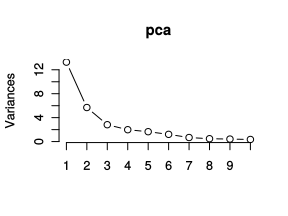

In [4]:
# plot amount of variance explained by each PC
plot(pca, type = "l")

PCA is also very useful for visualization. The human brain cannot visual a 31 dimensional feature space but by reducing the feature space in to two principal components we can then project the data down onto a 2-D space.

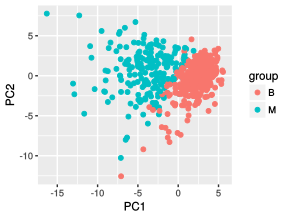

In [12]:
# create plot data
plot_data <- as.data.frame(pca$x)
plot_data$group <- dataset$diagnosis
# plot principal components
p<-ggplot(plot_data,aes(x=PC1,y=PC2,color=group ))
p<-p+geom_point()
print(p)